In [1]:
# !pip install mlx-vlm==0.1.27

In [2]:
from mlx_vlm import apply_chat_template, generate, load
from mlx_vlm.utils import load_image

In [3]:
model_path = "mlx-community/Nanonets-OCR-s-bf16"
model, processor = load(model_path)
config = model.config

/Users/ljoana/.pyenv/versions/nano/lib/python3.11/site-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

The image processor of type `Qwen2VLImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. Note that this behavior will be extended to all models in a future release.


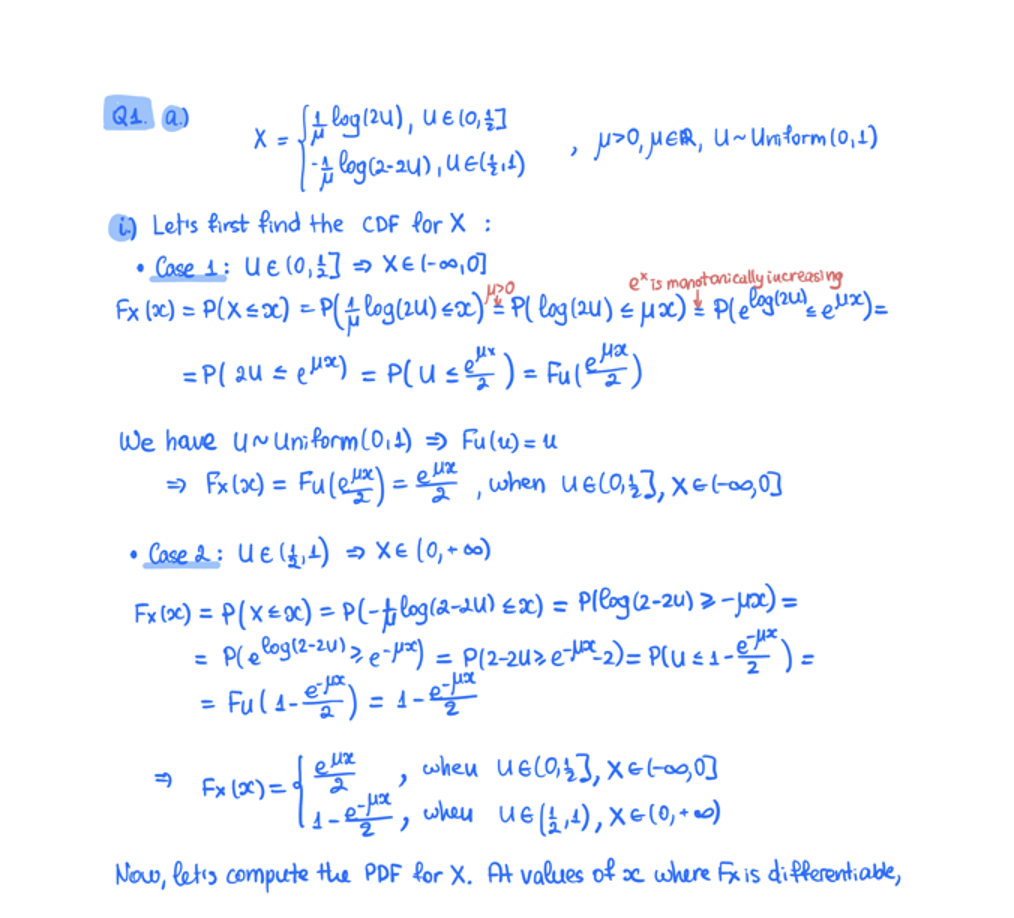

In [4]:
image_path = "../images/sc_1.png"
image = load_image(image_path)
image

In [5]:
type(image)

PIL.Image.Image

In [6]:
image.size

(1014, 918)

In [7]:
prompt = (
    "Extract the text from the above document as if you were reading it naturally. "
    "Return the tables in html format. Return the equations in LaTeX representation. "
    "If there is an image in the document and image caption is not present, add a small description of the image inside the <img></img> tag; otherwise, add the image caption inside <img></img>. " 
    "Watermarks should be wrapped in brackets. Ex: <watermark>OFFICIAL COPY</watermark>. "
    "Page numbers should be wrapped in brackets. Ex: <page_number>14</page_number> or <page_number>9/22</page_number>. Prefer using ☐ and ☑ for check boxes."
)

In [8]:
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": [
        {"type": "image", "image": f"file://{image_path}"},
        {"type": "text", "text": prompt},
    ]},
]

In [9]:
formatted_prompt = apply_chat_template(
    processor, config, messages
)

In [10]:
generate(model, processor, formatted_prompt, [image], verbose=True, max_tokens=2000)

Files: [<PIL.Image.Image image mode=RGB size=1014x918 at 0x4D88CB4D0>] 

Prompt: <|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
<|vision_start|><|image_pad|><|vision_end|>[{'type': 'image', 'image': 'file://../images/sc_1.png'}, {'type': 'text', 'text': 'Extract the text from the above document as if you were reading it naturally. Return the tables in html format. Return the equations in LaTeX representation. If there is an image in the document and image caption is not present, add a small description of the image inside the <img></img> tag; otherwise, add the image caption inside <img></img>. Watermarks should be wrapped in brackets. Ex: <watermark>OFFICIAL COPY</watermark>. Page numbers should be wrapped in brackets. Ex: <page_number>14</page_number> or <page_number>9/22</page_number>. Prefer using ☐ and ☑ for check boxes.'}]<|im_end|>
<|im_start|>assistant

Q1. a)

$$X = \begin{cases} \frac{1}{\mu} \log(2u), & u \in (0, \frac{1}{2}] \\ -\frac{1}{\mu} \lo

("Q1. a)\n\n$$X = \\begin{cases} \\frac{1}{\\mu} \\log(2u), & u \\in (0, \\frac{1}{2}] \\\\ -\\frac{1}{\\mu} \\log(2-2u), & u \\in (\\frac{1}{2}, 1) \\end{cases}, \\mu > 0, \\mu \\in \\mathbb{R}, u \\sim \\text{Uniform}(0,1)$$\n\ni) Let's first find the CDF for $X$:\n\n- **Case 1:** $u \\in (0, \\frac{1}{2}] \\Rightarrow X \\in (-\\infty, 0]$\n\n$$F_X(x) = P(X \\leq x) = P\\left(\\frac{1}{\\mu} \\log(2u) \\leq x\\right) = P\\left(\\log(2u) \\leq \\mu x\\right) = P\\left(e^{\\log(2u)} \\leq e^{\\mu x}\\right) =$$\n\n$$= P(2u \\leq e^{\\mu x}) = P(u \\leq \\frac{e^{\\mu x}}{2}) = F_U\\left(\\frac{e^{\\mu x}}{2}\\right)$$\n\nWe have $u \\sim \\text{Uniform}(0,1) \\Rightarrow F_U(u) = u$\n\n$$\\Rightarrow F_X(x) = F_U\\left(\\frac{e^{\\mu x}}{2}\\right) = \\frac{e^{\\mu x}}{2}, \\text{when } u \\in (0, \\frac{1}{2}], x \\in (-\\infty, 0]$$\n\n- **Case 2:** $u \\in (\\frac{1}{2}, 1) \\Rightarrow X \\in (0, +\\infty)$\n\n$$F_X(x) = P(X \\leq x) = P(-\\frac{1}{\\mu} \\log(2-2u) \\leq x) = P(\

# Output

Q1. a)

$$X = \begin{cases} \frac{1}{\mu} \log(2u), & u \in (0, \frac{1}{2}] \\ -\frac{1}{\mu} \log(2-2u), & u \in (\frac{1}{2}, 1) \end{cases}, \mu > 0, \mu \in \mathbb{R}, u \sim \text{Uniform}(0,1)$$

i) Let's first find the CDF for $X$:

- **Case 1:** $u \in (0, \frac{1}{2}] \Rightarrow X \in (-\infty, 0]$

$$F_X(x) = P(X \leq x) = P\left(\frac{1}{\mu} \log(2u) \leq x\right) = P\left(\log(2u) \leq \mu x\right) = P\left(e^{\log(2u)} \leq e^{\mu x}\right) =$$

$$= P(2u \leq e^{\mu x}) = P(u \leq \frac{e^{\mu x}}{2}) = F_U\left(\frac{e^{\mu x}}{2}\right)$$

We have $u \sim \text{Uniform}(0,1) \Rightarrow F_U(u) = u$

$$\Rightarrow F_X(x) = F_U\left(\frac{e^{\mu x}}{2}\right) = \frac{e^{\mu x}}{2}, \text{when } u \in (0, \frac{1}{2}], x \in (-\infty, 0]$$

- **Case 2:** $u \in (\frac{1}{2}, 1) \Rightarrow X \in (0, +\infty)$

$$F_X(x) = P(X \leq x) = P(-\frac{1}{\mu} \log(2-2u) \leq x) = P(\log(2-2u) \geq -\mu x) =$$

$$= P(e^{\log(2-2u)} \geq e^{-\mu x}) = P(2-2u \geq e^{-\mu x}) = P(u \leq 1 - \frac{e^{-\mu x}}{2}) =$$

$$= F_U(1 - \frac{e^{-\mu x}}{2}) = 1 - \frac{e^{-\mu x}}{2}$$

$$\Rightarrow F_X(x) = \begin{cases} \frac{e^{\mu x}}{2}, & \text{when } u \in (0, \frac{1}{2}], x \in (-\infty, 0] \\ 1 - \frac{e^{-\mu x}}{2}, & \text{when } u \in (\frac{1}{2}, 1), x \in (0, +\infty) \end{cases}$$

Now, let's compute the PDF for $X$. At values of $x$ where $F_X$ is differentiable,

# PDF Part

In [11]:
from mlx_vlm import apply_chat_template, generate, load
from pdf2image import convert_from_path
from tqdm.notebook import tqdm

In [12]:
pdf_path = "../pdfs/ass_2.pdf"

In [13]:
images = convert_from_path(pdf_path)
images

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2131>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2131>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2131>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2131>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2131>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2131>]

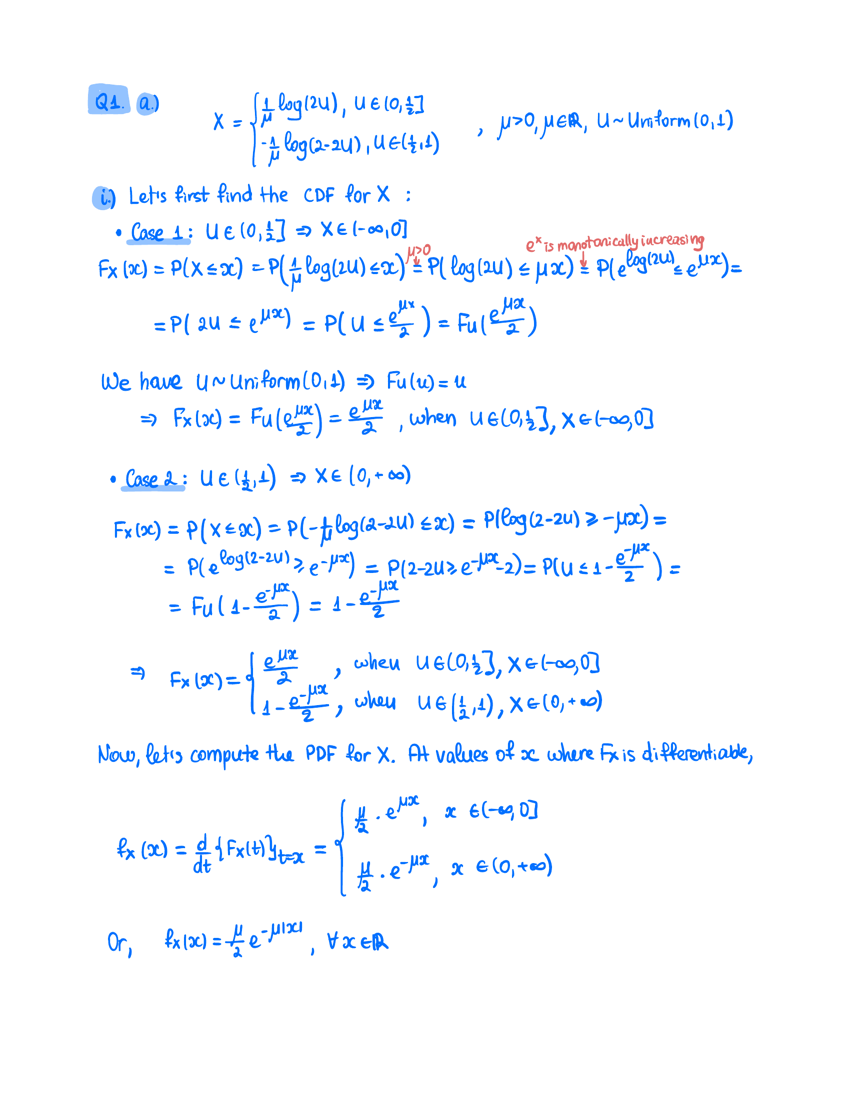

In [14]:
images[0].resize((850, 1100))

In [15]:
prompt = (
    "Extract the text from the above document as if you were reading it naturally. "
    "Return the tables in html format. Return the equations in LaTeX representation. "
    "If there is an image in the document and image caption is not present, add a small description of the image inside the <img></img> tag; otherwise, add the image caption inside <img></img>. " 
    "Watermarks should be wrapped in brackets. Ex: <watermark>OFFICIAL COPY</watermark>. "
    "Page numbers should be wrapped in brackets. Ex: <page_number>14</page_number> or <page_number>9/22</page_number>. Prefer using ☐ and ☑ for check boxes."
)

In [16]:
for idx, image in tqdm(enumerate(images[:1]), total=len(images[:1]), desc="Processing pages"):
    model_path = "mlx-community/Nanonets-OCR-s-bf16"
    model, processor = load(model_path)
    config = model.config

    image = image.resize((850, 1100))
    messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {
            "role": "user",
            "content": [
                {"type": "image", "image": image},
                {"type": "text", "text": prompt},
            ],
        },
    ]
    formatted_prompt = apply_chat_template(processor, config, messages)
    output = generate(
        model, processor, formatted_prompt, [image], verbose=True, max_tokens=2000
    )
    print(f"Finished generating page {idx} with {output[1]}")
    with open("output.md", "a", encoding="utf-8") as f:
        f.write(f"## Page {idx+1}\n\n")
        f.write(output[0])
        f.write("\n\n---\n\n")
    print(f"Finished writing page {idx}")

Processing pages:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/ljoana/.pyenv/versions/nano/lib/python3.11/site-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

Files: [<PIL.Image.Image image mode=RGB size=850x1100 at 0x4D868F190>] 

Prompt: <|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
<|vision_start|><|image_pad|><|vision_end|>[{'type': 'image', 'image': <PIL.Image.Image image mode=RGB size=850x1100 at 0x4D868F190>}, {'type': 'text', 'text': 'Extract the text from the above document as if you were reading it naturally. Return the tables in html format. Return the equations in LaTeX representation. If there is an image in the document and image caption is not present, add a small description of the image inside the <img></img> tag; otherwise, add the image caption inside <img></img>. Watermarks should be wrapped in brackets. Ex: <watermark>OFFICIAL COPY</watermark>. Page numbers should be wrapped in brackets. Ex: <page_number>14</page_number> or <page_number>9/22</page_number>. Prefer using ☐ and ☑ for check boxes.'}]<|im_end|>
<|im_start|>assistant

Q1 a)

$$X = \begin{cases} \frac{1}{\mu} \log(2U), & U \in (0, \

In [ ]:
# images = [image.resize((850, 1100)) for image in images]
# images

In [ ]:
# model_path = "mlx-community/Nanonets-OCR-s-bf16"
# model, processor = load(model_path)
# config = model.config

In [ ]:
# messages = [
#     {"role": "system", "content": "You are a helpful assistant."},
#     {"role": "user", "content": [
#         {"type": "image", "images": images},
#         {"type": "text", "text": prompt},
#     ]},
# ]

In [ ]:
# formatted_prompt = apply_chat_template(
#         processor, config, messages, num_images=len(images)
#     )

In [ ]:
# formatted_prompt

In [ ]:
# output = generate(model, processor, formatted_prompt, images, verbose=True, max_tokens=2000)